In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
plt.style.use('seaborn-darkgrid')

In [18]:
# --- download data and load in to dataframes ---
# --- I scraped the data from pro-football-reference.com
# and basketball-reference.com ---

# --- Denver Broncos ---
url_fb = 'https://www.pro-football-reference.com/teams/den/index.htm'
df_fb = pd.read_html(url_fb)[0]
df_fb.columns = df_fb.columns.get_level_values(1)
df_fb = df_fb[['Year', 'Lg', 'Tm', 'W', 'L']]
df_fb.drop(df_fb.index[[30, 31, 60, 62, 63]], inplace = True)
df_fb[['W', 'L', 'Year']] = df_fb[['W', 'L', 'Year']].astype('int')
df_fb['W/L%'] = df_fb['W'] / (df_fb['W'] + df_fb['L'])
df_fb = df_fb.sort_values('Year')
df_fb = df_fb.loc[df_fb['Year'] >= 1968]

#--- Denver Nuggets ---
url_bb = 'https://www.basketball-reference.com/teams/DEN/'
df_bb = pd.read_html(url_bb)[0]
df_bb = df_bb[['Season', 'Lg', 'Team', 'W', 'L', 'W/L%']]
bb_years = np.arange(1968, 2022)
bb_years = np.flip(bb_years)
df_bb['Year'] = bb_years
df_bb = df_bb.sort_values('Year')
df_bb = df_bb.loc[df_bb['Year'] <= 2020]

#--- Colorado Avalance ---
#--- I tried to add hockey in as well, but the lack of a season in 2004,
# data only goes back to 1989, and the Colorado Avalanche used to be in Quebec
# all complicated this attempt. Here's the commented code anyways ---

# url_h = 'https://www.hockey-reference.com/teams/COL/history.html'
# df_h = pd.read_html(url_h)[0]
# df_h = df_h[['Season', 'Lg', 'Team', 'W', 'L']]
# h_years = [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
#            2010, 2009, 2008, 2007, 2006, 2004, 2003, 2002, 2001, 2000, 1999,
#            1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
#            1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980]
# df_h['Year'] = h_years
# df_h['W/L%'] = df_h['W'] / (df_h['W'] + df_h['L'])
# df_h = df_h.sort_values('Year')

In [19]:
# print(df_fb.dtypes)
# print(df_bb.dtypes)
# print(df_h.dtypes)

# print(len(df_fb))
# print(len(df_bb))
# print(len(df_h))

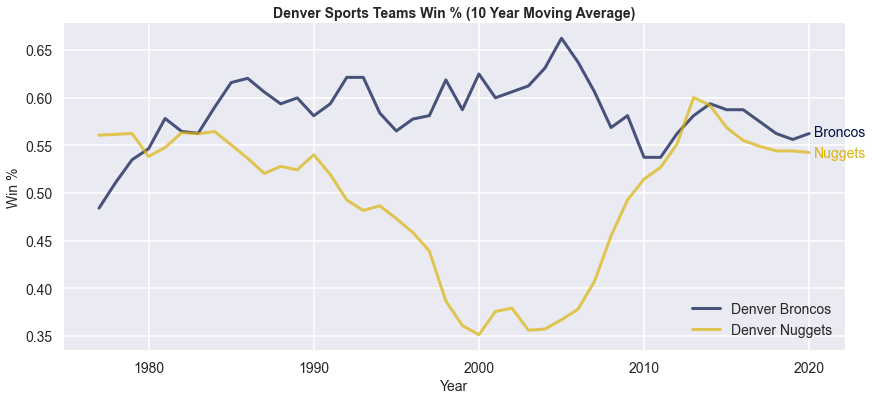

In [24]:
x1 = df_fb['Year']
y1 = df_fb['W/L%'].rolling(window = 10).mean() #10 year moving average

x2 = df_bb['Year']
y2 = df_bb['W/L%'].rolling(window = 10).mean() #10 year moving average 
#xticks = np.flip(ax.get_xticks()[::1])

fig, ax = plt.subplots(figsize = (14,6))
ax.plot(x1,y1, color = '#001146', alpha = 0.7,
       label = 'Denver Broncos', linewidth = 3) #Broncos
ax.plot(x2,y2, color = '#dbb40c', alpha = 0.7,
       label = 'Denver Nuggets', linewidth = 3) #Avalanche
ax.set_title('Denver Sports Teams Win % (10 Year Moving Average)',
            fontsize = 14, weight = 'bold')
ax.set_xlabel('Year', fontsize = 14)
plt.xticks(fontsize = 14)
ax.set_ylabel('Win %', fontsize = 14)
plt.yticks(fontsize = 14)
ax.legend(loc = 'lower right', fontsize = 14)
ax.annotate('Broncos', xy = (2020, 0.56),
           xytext = (2020.3, 0.56), color = '#001146',
           fontsize = 14)
ax.annotate('Nuggets', xy = (2020, 0.54),
           xytext = (2020.3, 0.538), color = '#dbb40c',
           fontsize = 14)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_xticks(x1[::5])
# plt.locator_params(axis='x', nbins=10)

fig.savefig('/Users/martinpalkovic/Desktop/Data_Science/Applied_DataScience_Python/WinPct.png')